# Normalization of a Wave Function

## Problem Statement
A particle is described by the wave function $\psi(x)$:

$$
\psi(x) = \left\{
\begin{array}{cc}
0 & x < 0 \\
c e^{-x / L} & x \geq 0
\end{array}
\right.
$$

Given the normalization requirement:

$$
\int_{-\infty}^{+\infty} |\psi(x)|^2 \, dx = 1
$$

find the constant $c$ where $L = 1 \, \text{nm}$.

## Solution

First, we express the normalization condition for $\psi(x)$:

$$
\int_{-\infty}^{+\infty} |\psi(x)|^2 \, dx = 1
$$

Given $\psi(x)$, we have:

$$
|\psi(x)|^2 = \left\{
\begin{array}{cc}
0 & x < 0 \\
c^2 e^{-2x / L} & x \geq 0
\end{array}
\right.
$$

The dimensionless integral becomes:

$$
\int_{-\infty}^{+\infty} |\psi(x)|^2 \, dx = \int_{0}^{+\infty} c^2 e^{-2x / L} \, dx
$$

Evaluating this integral:

$$
\int_{0}^{+\infty} c^2 e^{-2x / L} \, dx = c^2 \int_{0}^{+\infty} e^{-2x / L} \, dx
$$

Let $u = \frac{2x}{L}$, then $dx = \frac{L}{2} du$. The integral now becomes:

$$
c^2 \int_{0}^{+\infty} e^{-u} \cdot \frac{L}{2} \, du = c^2 \cdot \frac{L}{2} \int_{0}^{+\infty} e^{-u} \, du
$$

We know that:

$$
\int_{0}^{+\infty} e^{-u} \, du = 1
$$

Therefore:

$$
c^2 \cdot \frac{L}{2} = 1
$$

Solving for $c$:

$$
c^2 = \frac{2}{L}
$$

Given $L = 1 \, \text{nm}$:

$$
c^2 = \frac{2}{1 \, \text{nm}} = \frac{2}{10^{-9} \, \text{m}} = 2 \times 10^9 \, \text{m}^{-1}
$$

Thus:

$$
c = \sqrt{2 \times 10^9 \, \text{m}^{-1}} = \sqrt{2} \times 10^4 \, \text{m}^{-1/2} = \sqrt{2} \times 10^9 \, \text{nm}^{-1/2}
$$

Therefore, the normalization constant $c$ is:

$$
c = \sqrt{2} \times 10^4 \, \text{nm}^{-1/2}
$$


# Cell 1: Using matplotlib and Monte Carlo estimation to draw the PDF


### Monte Carlo Estimation Process

The Monte Carlo estimation process involves using random sampling to approximate the probability of an event or the value of an integral. In this case, we are using it to estimate the probability that the particle will be found in the region $x \geq 1 \, \text{nm}$.

1. **Random Sampling**:
   - The line `x_samples = np.random.exponential(scale=L, size=N)` generates `N` random samples from an exponential distribution with a scale parameter `L` (which is $1 \, \text{nm}$). This is because the probability density function (PDF) of the wave function squared, $|\psi(x)|^2$, for $x \geq 0$ is proportional to an exponential distribution.

2. **Counting the Samples**:
   - The line `np.sum(x_samples >= L)` counts the number of samples where the sampled value is greater than or equal to $1 \, \text{nm}$.

3. **Estimating the Probability**:
   - The line `prob_x_ge_1nm = np.sum(x_samples >= L) / N` calculates the proportion of samples that satisfy $x \geq 1 \, \text{nm}$. This proportion is an estimate of the probability that the particle will be found in the region $x \geq 1 \, \text{nm}$.


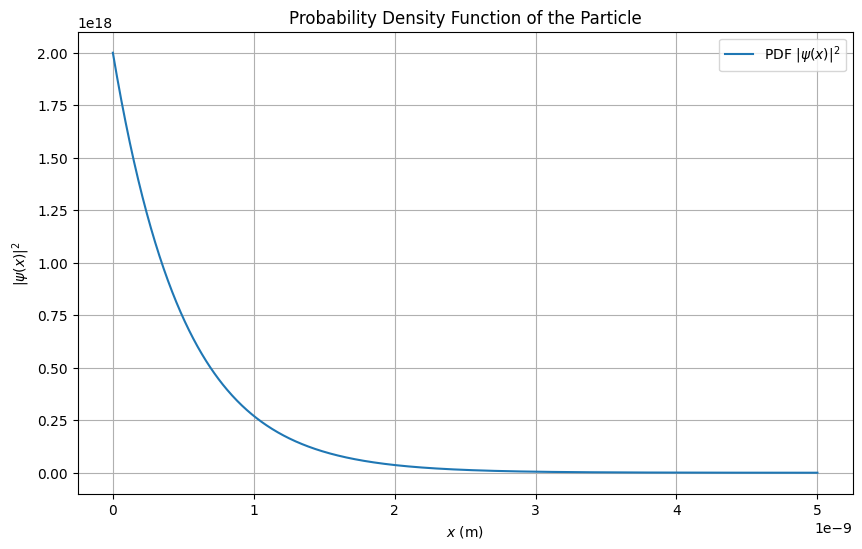

Monte Carlo estimated probability (x >= 1 nm): 0.367566
Analytical probability (x >= 1 nm): 0.36787944117144233
Relative error: 0.09%


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the wave function psi(x)
L = 1e-9  # 1 nm
c = np.sqrt(2) * 1e9  # normalization constant in nm^-1/2

def psi(x):
    return np.where(x >= 0, c * np.exp(-x / L), 0)

# Define the PDF |psi(x)|^2
def pdf(x):
    return psi(x)**2

# Monte Carlo estimation
N = 1000000  # number of samples
x_samples = np.random.exponential(scale=L, size=N)
prob_x_ge_1nm = np.sum(x_samples >= L) / N

# Analytical solution for comparison
prob_x_ge_1nm_analytic = np.exp(-1)

# Calculate relative error
relative_error = np.abs(prob_x_ge_1nm - prob_x_ge_1nm_analytic) / prob_x_ge_1nm_analytic * 100

# Plot the PDF
x_vals = np.linspace(0, 5e-9, 1000)
pdf_vals = pdf(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, pdf_vals, label=r'PDF $|\psi(x)|^2$')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$|\psi(x)|^2$')
plt.title('Probability Density Function of the Particle')
plt.legend()
plt.grid(True)
plt.show()

# Display the estimated probability and relative error
print(f"Monte Carlo estimated probability (x >= 1 nm): {prob_x_ge_1nm}")
print(f"Analytical probability (x >= 1 nm): {prob_x_ge_1nm_analytic}")
print(f"Relative error: {relative_error:.2f}%")


# Cell 2: Using SciPy Integrate to numerically estimate the same probability


### Numerical Estimation of Probability Using SciPy Integration

It appears that the SciPy integrate package's `quad` function is evaluating to 0.0. This might be due to the rapidly decaying exponential function, which causes the numerical integration to lose precision. The values at $1 \, \text{nm}$ and beyond are extremely small, and the integration might not be capturing these small values accurately.

To address this, the following was implemented:

- **Adjust the Integration Precision**: Increased the precision parameters `epsabs` and `epsrel` in the `quad` function.
- **Alternative Method**: Used `quad_vec` to see if it provides better results.


In [8]:
import numpy as np
from scipy.integrate import quad, quad_vec

# Define the wave function psi(x)
L = 1e-9  # 1 nm
c = np.sqrt(2) * 1e9  # normalization constant in nm^-1/2

def psi(x):
    """
    Wave function psi(x).
    
    Parameters:
    x (float or np.ndarray): Position(s) at which to evaluate psi(x).
    
    Returns:
    float or np.ndarray: Value(s) of psi(x).
    """
    return np.where(x >= 0, c * np.exp(-x / L), 0)

def pdf(x):
    """
    Probability density function |psi(x)|^2.
    
    Parameters:
    x (float or np.ndarray): Position(s) at which to evaluate |psi(x)|^2.
    
    Returns:
    float or np.ndarray: Value(s) of |psi(x)|^2.
    """
    return psi(x)**2

# Debugging: Print PDF values at different points to ensure correctness
print(f"PDF at 0 nm: {pdf(0)}")
print(f"PDF at 1 nm: {pdf(1e-9)}")
print(f"PDF at 10 nm: {pdf(10e-9)}")

# Integrate the PDF from 1 nm to infinity with increased precision
result, error = quad(pdf, 1e-9, np.inf, epsabs=1e-12, epsrel=1e-12)

# Alternative method: using quad_vec
result_vec, error_vec = quad_vec(pdf, 1e-9, np.inf)

# Analytical solution for comparison
prob_x_ge_1nm_analytic = np.exp(-1)

# Display the result and the relative error
relative_error = np.abs(result - prob_x_ge_1nm_analytic) / prob_x_ge_1nm_analytic * 100
relative_error_vec = np.abs(result_vec - prob_x_ge_1nm_analytic) / prob_x_ge_1nm_analytic * 100

print(f"SciPy (quad) estimated probability (x >= 1 nm): {result}")
print(f"SciPy (quad_vec) estimated probability (x >= 1 nm): {result_vec}")
print(f"Analytical probability (x >= 1 nm): {prob_x_ge_1nm_analytic}")
print(f"Relative error (quad): {relative_error:.2f}%")
print(f"Relative error (quad_vec): {relative_error_vec:.2f}%")


PDF at 0 nm: 2e+18
PDF at 1 nm: 2.7067056647322538e+17
PDF at 10 nm: 4122307244.8771167
SciPy (quad) estimated probability (x >= 1 nm): 0.0
SciPy (quad_vec) estimated probability (x >= 1 nm): 0.0
Analytical probability (x >= 1 nm): 0.36787944117144233
Relative error (quad): 100.00%
Relative error (quad_vec): 100.00%
